In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("pet_supplies_cleaned_2212.csv")
df=df.rename(columns = {'repeate_purchase':'repeat_purchase'})
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,3,Food,Dog,Medium,31.23,898.30,5,1
1,4,Medicine,Cat,Small,24.95,982.15,6,1
2,5,Housing,Cat,Small,26.18,832.63,7,1
3,6,Housing,Dog,Small,30.77,874.58,7,0
4,472,Medicine,Dog,Medium,28.06,842.07,0,0


In [43]:
df2 = pd.read_csv("pet_supplies_category_groupby_repeat_purchase.csv")
df2

,category,total_repeat_purchase
0,Medicine,153
1,Unknown,14
2,Food,151
3,Equipment,221
4,Accessory,70
5,Housing,152
6,Toys,145


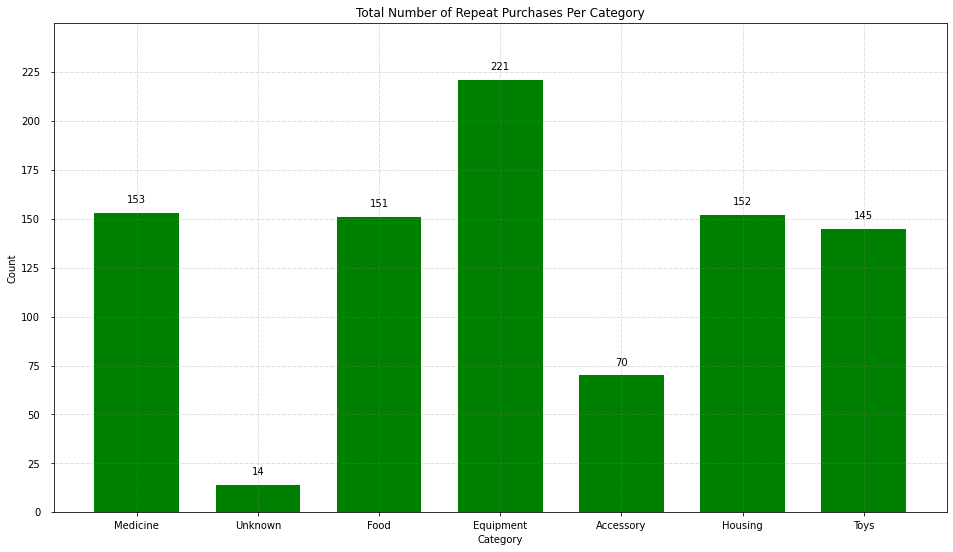

In [91]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+5, y[i], ha = 'center')

fig, ax = plt.subplots(figsize =(16, 9))

plt.bar(df2['category'],df2['total_repeat_purchase'], width=0.7, color='green')

ax.set(ylim=(0, 250), yticks=np.arange(0, 250, 25))

# Add x, y gridlines
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.5)

addlabels(df2['category'],df2['total_repeat_purchase'])
        
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Total Number of Repeat Purchases Per Category")
plt.savefig('category_total_repeat_purchase.png')
plt.show()